## Assignment 6 

This assignment is based on the mathematical background of EM and  PCA algorithm which we have learned is going to be put on test in this assignment.

1. Implement your own EM algorithm to cluster the old faithful data set into 4 groups. We encourage you not to use Scikit learns implementation of the EM algorithm.  If you are facing too much difficulty during implementation you can use packages no marks will be deducted for that. However, please try your best to avoid using packages.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [60]:
df = pd.read_csv("oldFaithful.csv")
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [63]:
X = df.iloc[:].values

In [72]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

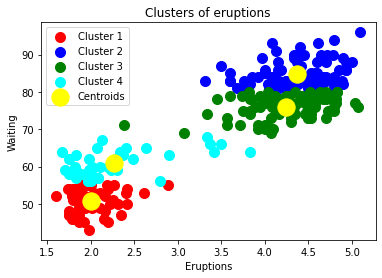

In [73]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of eruptions')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.legend()
plt.show()

2. In the study notes, you have learned how to implement your own PCA algorithm to reduce the dimensionality of a dataset. In this exercise, you are supposed to perform dimensionality reduction on the iris data set(from 4 to 2) using the Scikit learns implementation of PCA. The Documentation of which can be found at the link:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

After reducing the dimensionality draw a scatter plot.

In [42]:
df = pd.read_csv("iris.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_train_df = pd.DataFrame(data = principalComponents
             , columns = ['Train PC 1', 'Train PC 2'])

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_test = pca.fit_transform(X_test)
X_test_df = pd.DataFrame(data = principalComponents
             , columns = ['Test PC 1', 'Test PC 2'])

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0 11]
 [ 8  5  0]
 [ 6  0  0]]


0.16666666666666666

In [51]:
finaldf_train = pd.concat([X_train_df, df[['class']]], axis = 1)
finaldf_test = pd.concat([X_test_df, df[['class']]], axis = 1)

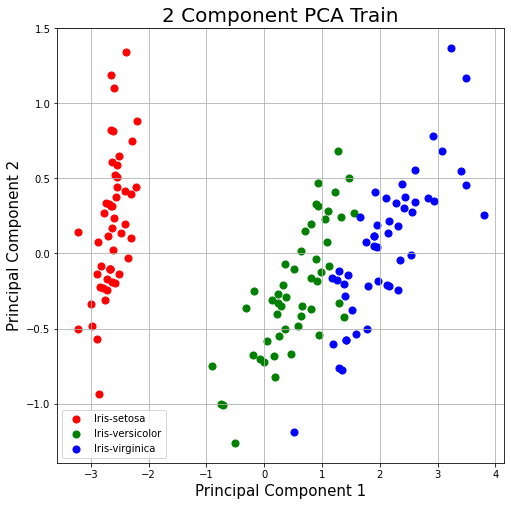

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Train', fontsize = 20)

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(classes,colors):
    indicesToKeep = finaldf_train['class'] == target
    ax.scatter(finaldf_train.loc[indicesToKeep, 'Train PC 1']
               , finaldf_train.loc[indicesToKeep, 'Train PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

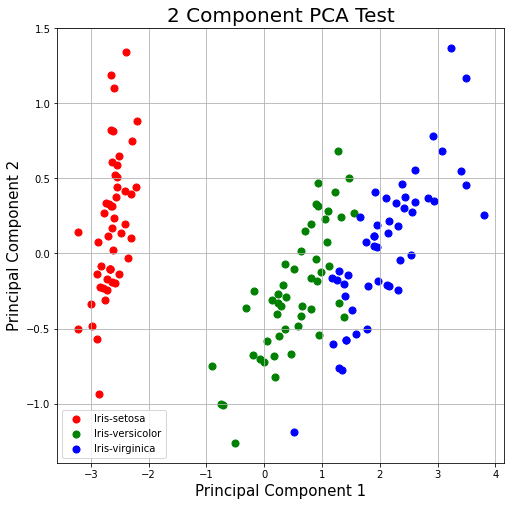

In [58]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Test', fontsize = 20)

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(classes,colors):
    indicesToKeep = finaldf_test['class'] == target
    ax.scatter(finaldf_test.loc[indicesToKeep, 'Test PC 1']
               , finaldf_test.loc[indicesToKeep, 'Test PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()